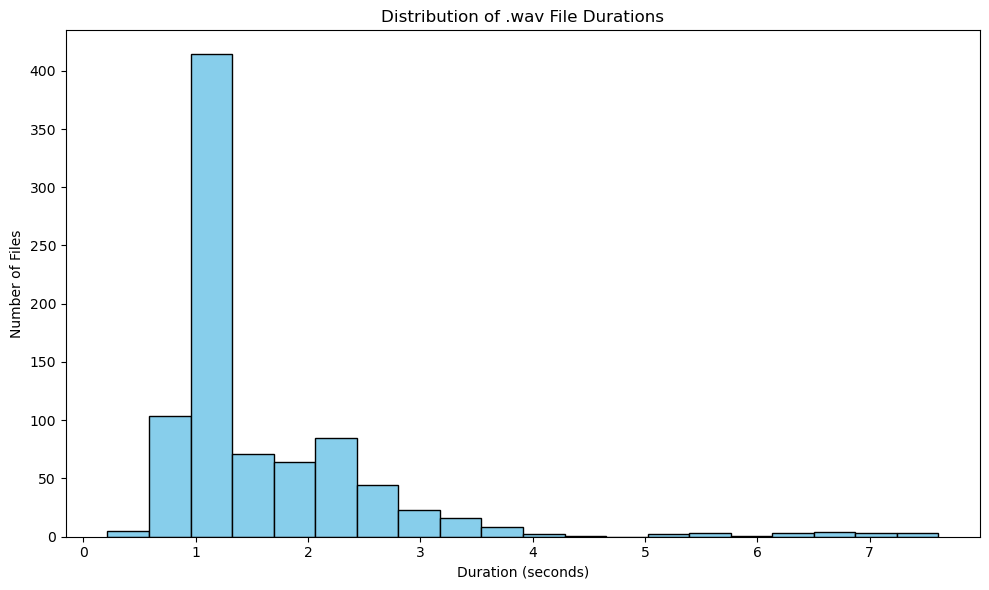

In [1]:
import os
import wave
import contextlib
import matplotlib.pyplot as plt

def get_wav_file_duration(file_path):
    with contextlib.closing(wave.open(file_path, 'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
        return duration

def gather_wav_file_info(folder_path):
    wav_durations = []
    wav_file_paths = []
    
    # Walk through the folder and its subfolders
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(root, file)
                duration = get_wav_file_duration(file_path)
                wav_durations.append(duration)
                wav_file_paths.append(file_path)
                
    return wav_durations, wav_file_paths

def plot_wav_file_durations_histogram(wav_durations):
    # Plotting histogram
    plt.figure(figsize=(10, 6))
    plt.hist(wav_durations, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Number of Files')
    plt.title('Distribution of .wav File Durations')
    plt.tight_layout()
    plt.show()

# Example usage
folder_path = './clusters225-2000Hz'
wav_durations, wav_file_paths = gather_wav_file_info(folder_path)
plot_wav_file_durations_histogram(wav_durations)


Plotting spectrogram for: ./clusters225-2000Hz\000\SM15XPRIZE_20240409_162702_0_00027_255.wav


C:\Users\Ripple\AppData\Local\Temp\ipykernel_20976\1144643928.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read(file_path)
C:\Users\Ripple\AppData\Local\Temp\ipykernel_20976\1144643928.py:6: WavFileWarning: Reached EOF prematurely; finished at 237748 bytes, expected 237756 bytes from header.
  sample_rate, samples = wavfile.read(file_path)


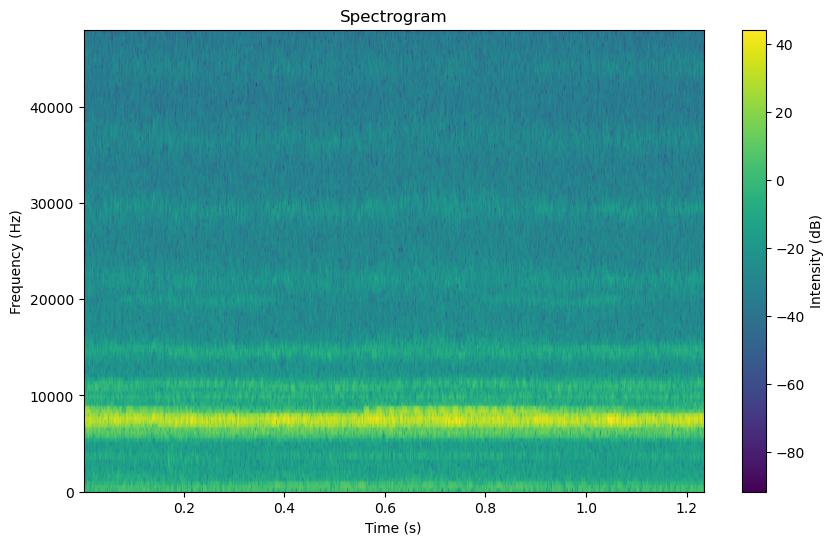

Reducing noise: ./clusters225-2000Hz\000\SM15XPRIZE_20240409_162702_0_00027_255.wav


NameError: name 'reduce_noise' is not defined

In [2]:
import numpy as np
from scipy.io import wavfile


def plot_spectrogram(file_path):
    sample_rate, samples = wavfile.read(file_path)
    plt.figure(figsize=(10, 6))
    plt.specgram(samples, Fs=sample_rate, cmap='viridis')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Spectrogram')
    plt.colorbar(label='Intensity (dB)')
    plt.show()

# Plot spectrograms for a few selected files
# You can modify the range or select specific files based on your needs
for file_path in wav_file_paths[:1]:  # Change the number as needed
    print(f"Plotting spectrogram for: {file_path}")
    plot_spectrogram(file_path)
